In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def smooth(arr, alpha=0.1):
    smoothed = []
    for i in range(len(arr)):
        if i == 0:
            smoothed.append(arr[i])
        else:
            smoothed.append((1-alpha)*smoothed[-1]+alpha*arr[i])
    return np.array(smoothed)

def plot_results(arr, title, dim_range):
    linewidth = 4
    fontsize = 15

    plt.figure(figsize=(7, 5))

    ax = plt.subplot(1, 1, 1)
    min_ = arr.min(axis=0)
    max_ = arr.max(axis=0)
    mean = arr.mean(axis=0)

    plt.plot(dim_range, mean, linewidth=linewidth)
    ax.fill_between(dim_range, min_, max_, alpha=0.15)

    plt.grid()
    plt.ylabel('Sum of rewards for episode', fontsize=fontsize)
    plt.xlabel('episode', fontsize=fontsize)
    plt.title(title, fontsize=fontsize)

In [11]:
def plot_results_different(results_1, results_2, titles, dim_range,
                           reverse_order=False):
    linewidth = 4
    fontsize = 15

    plt.figure(figsize=(7, 5))

    if not reverse_order:
        ax = plt.subplot(1, 1, 1)
        arr = results_1

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='baseline')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

        arr = results_2

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='UCB')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

    else:
        ax = plt.subplot(1, 1, 1)
        arr = results_2
        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='UCB', color='#ff7f0e')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)

        arr = results_1

        min_ = arr.min(axis=0)
        max_ = arr.max(axis=0)
        mean = arr.mean(axis=0)

        plt.plot(dim_range, mean, linewidth=linewidth, label='baseline', color='#1f77b4')
        ax.fill_between(dim_range, min_, max_, alpha=0.15)
            
        #smoothed = smooth(mean, alpha=0.2)
        #plt.plot(dim_range, smoothed, linewidth=2)

    plt.grid()
    plt.ylabel('Sum of rewards per episode', fontsize=fontsize)
    plt.xlabel('episode', fontsize=fontsize)
    plt.title(titles, fontsize=fontsize)
    plt.legend(loc='lower right')

In [4]:
def plot_history(history):
    plt.plot(history[:,0], history[:,1], '.', color='red')
    plt.grid()
    plt.xlim((-1.2,0.6))

In [5]:
def plot_different_history(history_1, history_2, num_steps):
    fontsize=15
    
    plt.plot(history_2[:,0], history_2[:,1], '.', label='UCB', color='#ff7f0e')
    plt.plot(history_1[:,0], history_1[:,1], '.', label='baseline', color='#1f77b4')

    plt.legend(loc='upper right', fontsize=15)
    plt.xlabel('Position', fontsize=fontsize)
    plt.ylabel('Velocity', fontsize=fontsize)
    plt.title('Mountain Car: state space visitation after {}k steps'.format(num_steps//1000), fontsize=fontsize)
    plt.grid()

In [6]:
results = np.load('results/dqn_environments/mountain_car.npy')
history = np.load('results/dqn_environments/mountain_car_history.npy')

In [7]:
ucb_results = np.load('results/dqn_environments/mountain_car_ucb.npy')
ucb_history = np.load('results/dqn_environments/mountain_car_ucb_history.npy')

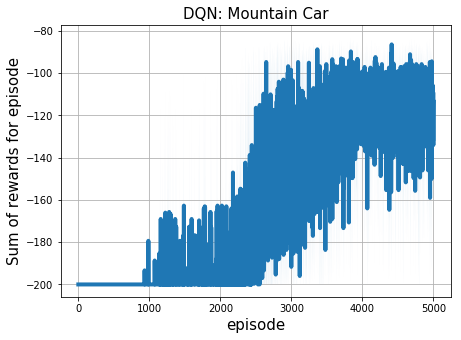

In [15]:
plot_results(results, 'DQN: Mountain Car', np.arange(results.shape[1]))

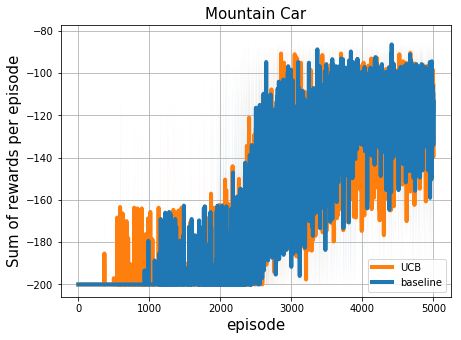

In [8]:
plot_results_different(results, ucb_results, 'Mountain Car', np.arange(ucb_results.shape[1]), reverse_order=True)

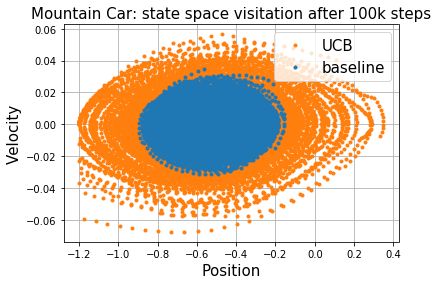

In [9]:
plot_different_history(history[:500*200], ucb_history[:500*200], 500*200)

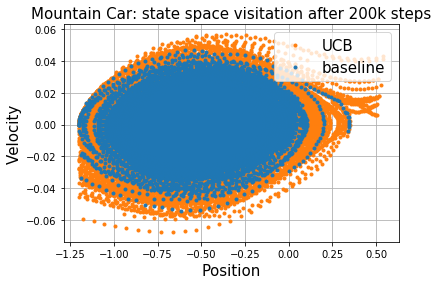

In [10]:
plot_different_history(history[:1000*200], ucb_history[:1000*200], 1000*200)

In [16]:
sparse_results = np.load('results/dqn_environments/mountain_car_sparse.npy')
sparse_history = np.load('results/dqn_environments/mountain_car_sparse_history.npy')

In [17]:
sparse_results_ucb = np.load('results/dqn_environments/mountain_car_sparse_ucb.npy')
sparse_history_ucb = np.load('results/dqn_environments/mountain_car_sparse_ucb_history.npy')

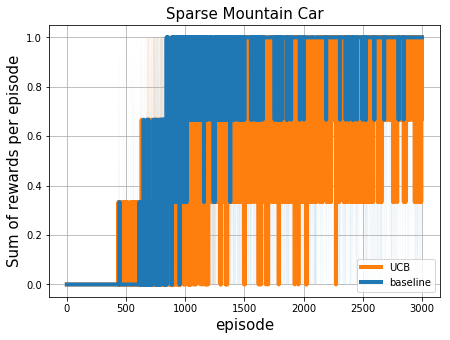

In [18]:
plot_results_different(sparse_results, sparse_results_ucb, 'Sparse Mountain Car',
                       np.arange(sparse_results.shape[1]), reverse_order=True)